In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt


# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse

# CTP Library
from CTPLIB import CTP_LinReg


In [2]:
df = pd.read_csv('data/NBA_train.csv')
df.head().T

,0,1,2,3,4
SeasonEnd,1980,1980,1980,1980,1980
Team,Atlanta Hawks,Boston Celtics,Chicago Bulls,Cleveland Cavaliers,Denver Nuggets
Playoffs,1,1,0,0,0
W,50,61,30,37,30
PTS,8573,9303,8813,9360,8878
oppPTS,8334,8664,9035,9332,9240
FG,3261,3617,3362,3811,3462
FGA,7027,7387,6943,8041,7470
2P,3248,3455,3292,3775,3379
2PA,6952,6965,6668,7854,7215


# Finding how many wins needed to make the playoffs 

* Compute the mean and standard deviation for the number of wins for teams that DID NOT  make the playoffs.
* Determine the wins above which 95% of the non-playoff teams fall

In [12]:
# Extract wins for teams that made and didn't make the playoffs
playoff_wins = df[df['Playoffs'] == 1]['W'].values
non_playoff_wins = df[df['Playoffs'] == 0]['W'].values


from scipy.stats import norm

# Calculate mean and standard deviation for non-playoff wins
mean_non_playoff_wins = np.mean(non_playoff_wins)
std_non_playoff_wins = np.std(non_playoff_wins)

# Determine the wins above which 95% of the non-playoff teams fall
threshold_wins_95 = norm.ppf(0.95, mean_non_playoff_wins, std_non_playoff_wins)
threshold_wins_95


42.143048518209866

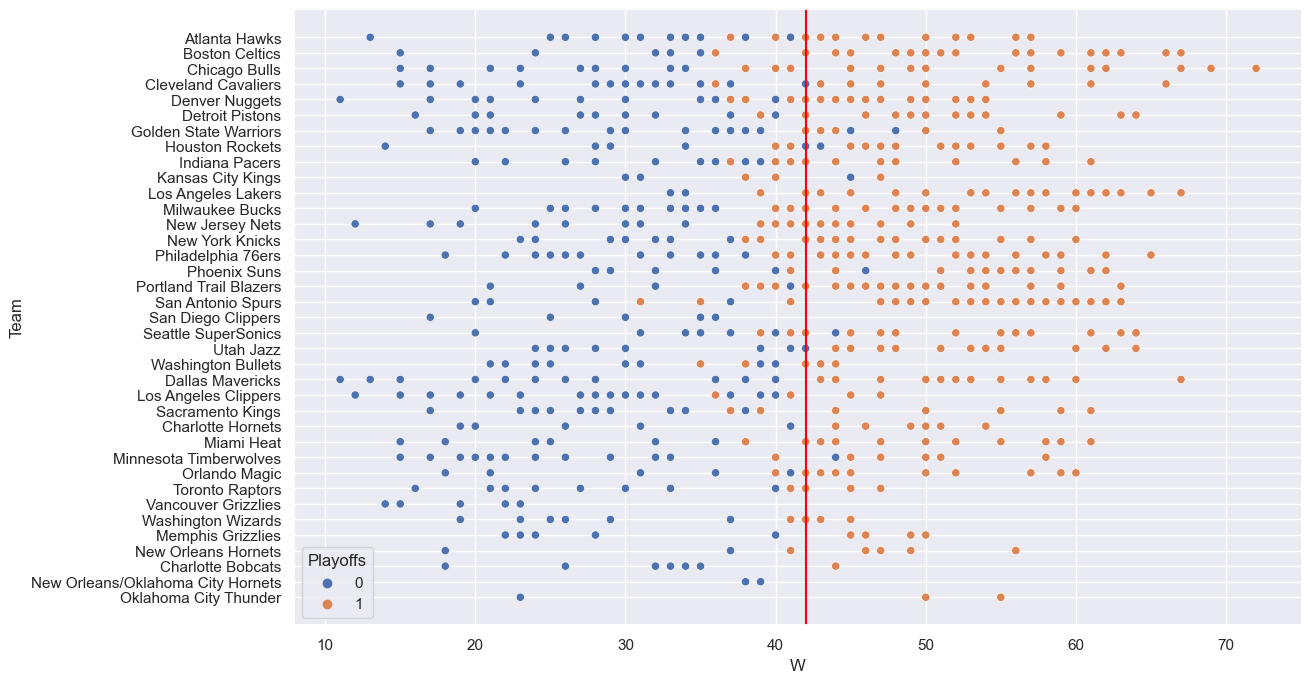

In [14]:
sns.set()
plt.figure(figsize=(13, 8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=int(threshold_wins_95), color='red')

In [3]:
df['points_diff'] = df['PTS'] - df['oppPTS']

independent_vars = 'points_diff'
dependent_var = 'W'

<Axes: >

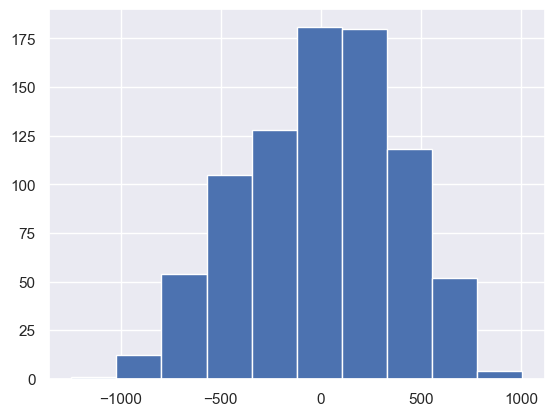

In [20]:
df.points_diff.hist()

In [23]:
model_wins = CTP_LinReg(df, independent_vars, dependent_var, simple=True)
model_wins.build_model()

#### run code below to check for all gotchyas
# model_wins.run_all()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:38:25   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.0000      0.106    387.027      

## Use the model coefficents to find how many points_diff we need to safely win our target of 42 Wins to make the playoffs

In [24]:
wins_needed_to_make_playoffs = int(threshold_wins_95)


coef_y_int = model_wins.model.params['const']
coef_runs_diff = model_wins.model.params['points_diff']

print(wins_needed_to_make_playoffs, coef_y_int, coef_runs_diff)


min_pts_diff = (wins_needed_to_make_playoffs - coef_y_int) / coef_runs_diff
min_pts_diff


42 40.99999999999999 0.0325863328211329


30.687712099702324

## Here we need to score 30.68 more points than we allow to make win 42 games and make the playoffs

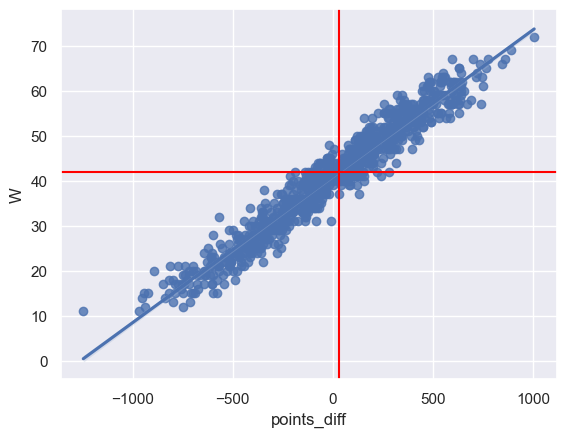

In [25]:
ax = sns.regplot(df, x='points_diff', y='W' )
ax.axvline(x=min_pts_diff, color='red')
ax.axhline(y=wins_needed_to_make_playoffs, color='red')

# KITCHEN SINK MODEL 
* Build a model for points scored using everything we have.

Index(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'points_diff'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:38:47   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
  

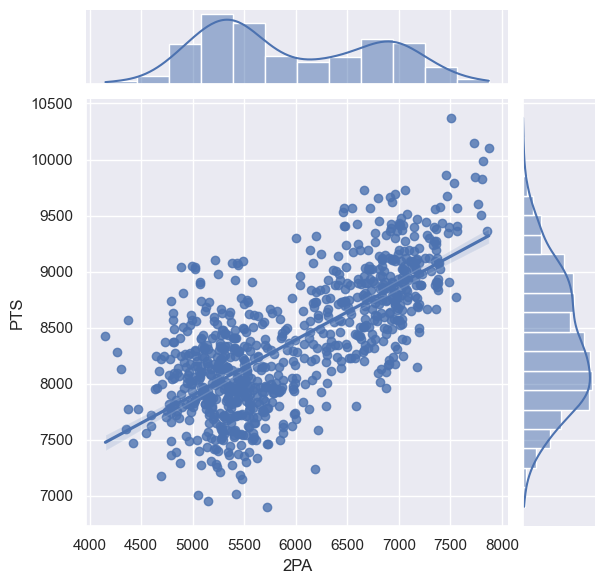

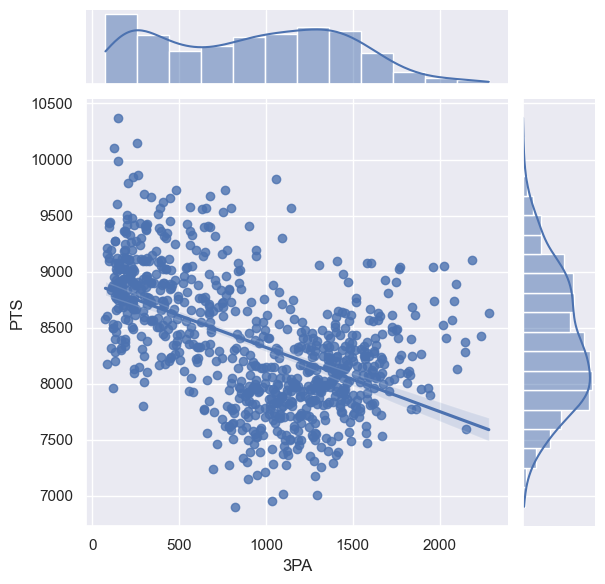

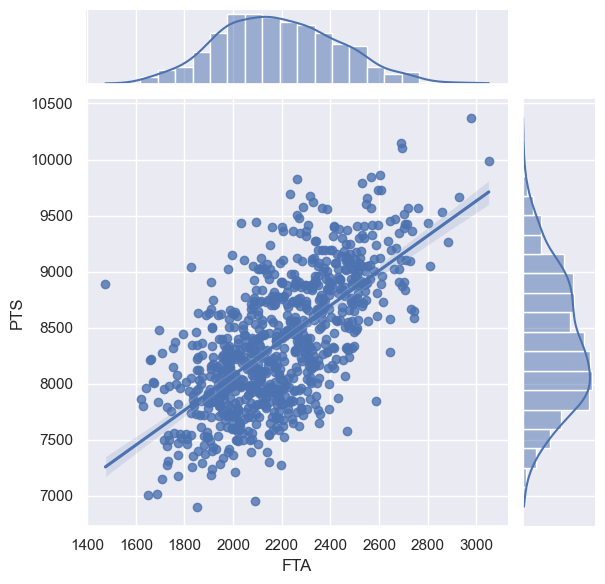

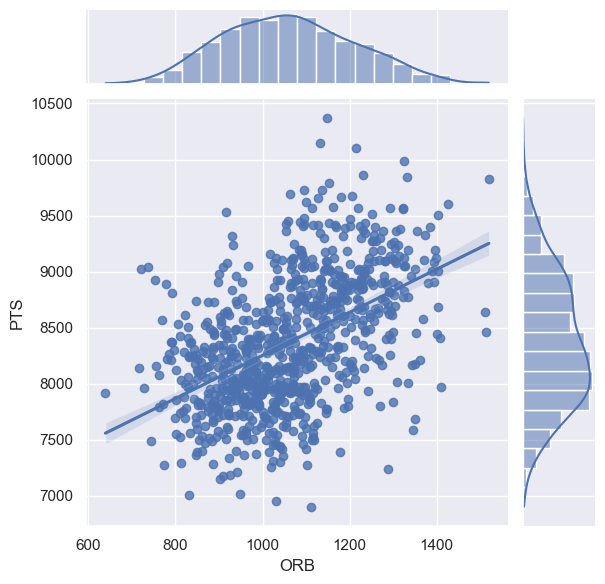

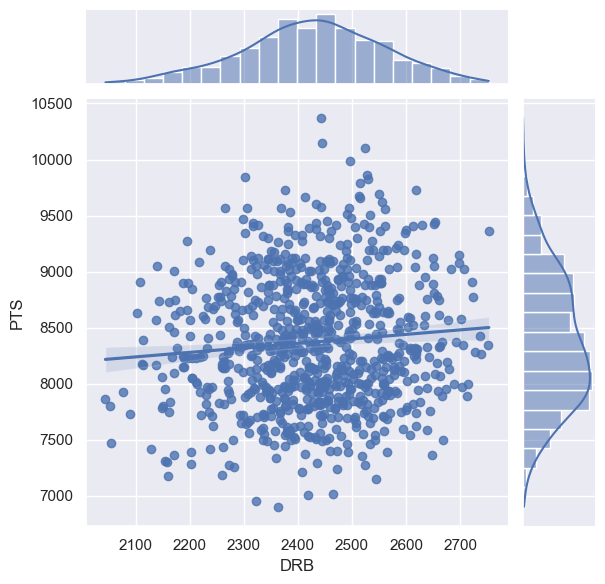

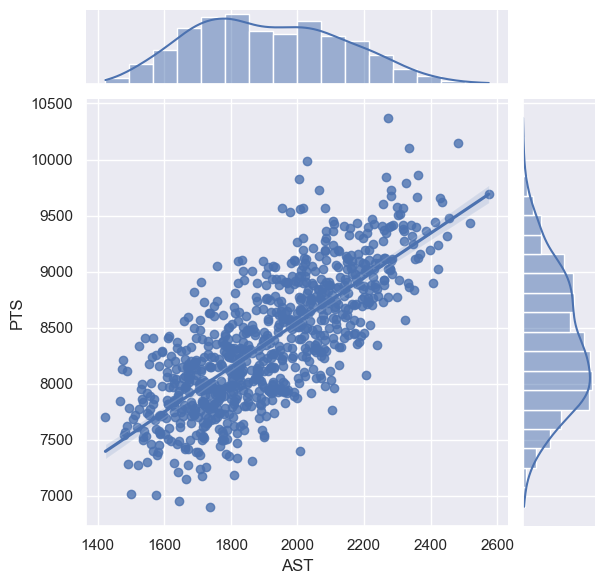

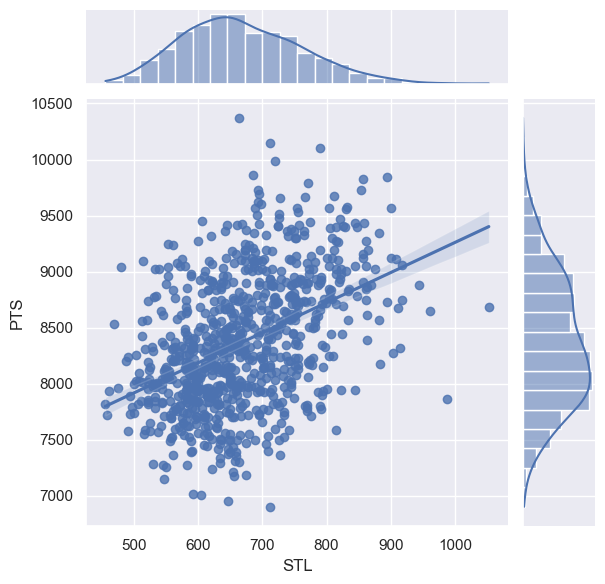

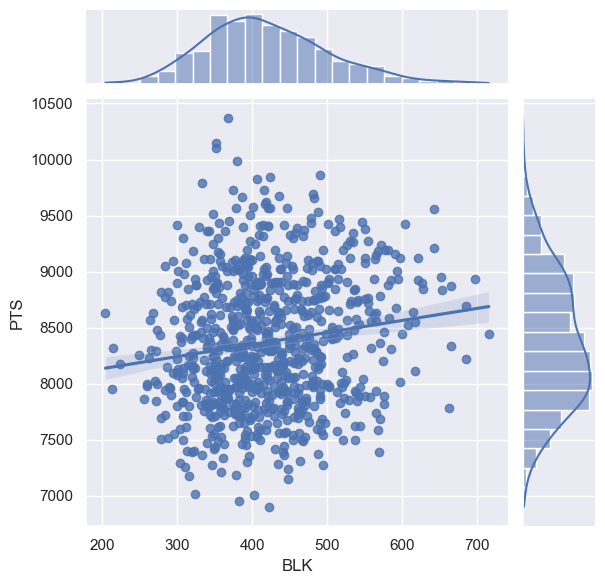

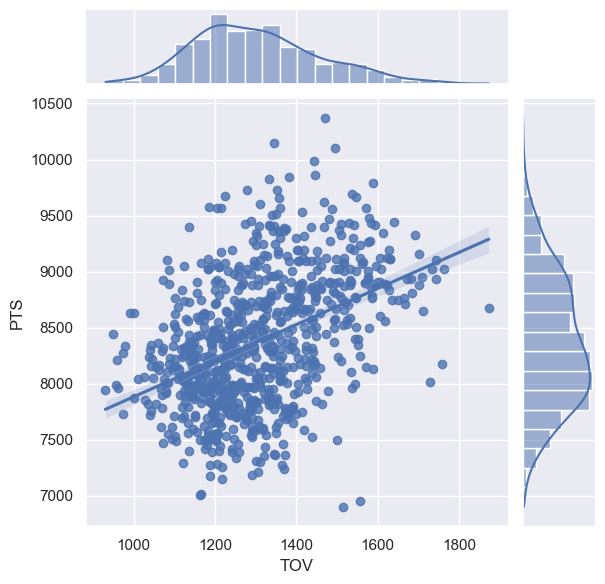

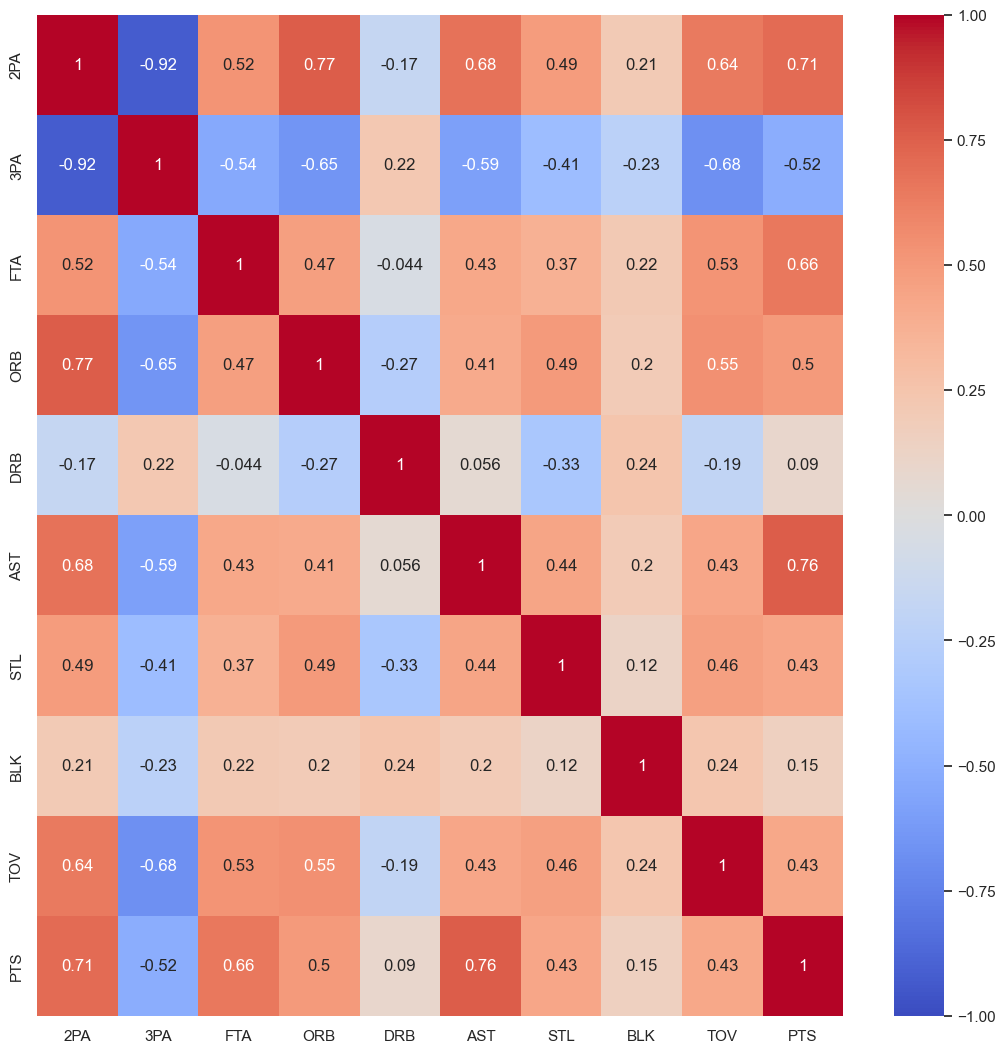

###############################################################################
Variance Inflaction Factors
         const        2PA       3PA       FTA       ORB       DRB     AST  \
0  1004.571127  14.612764  9.827771  1.648202  3.320314  1.568583  2.2997   

        STL       BLK       TOV  
0  1.781731  1.264983  2.150146  
###############################################################################
###############################################################################
Checking Normality


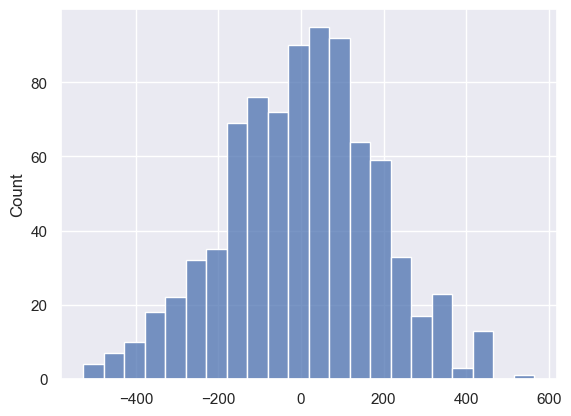

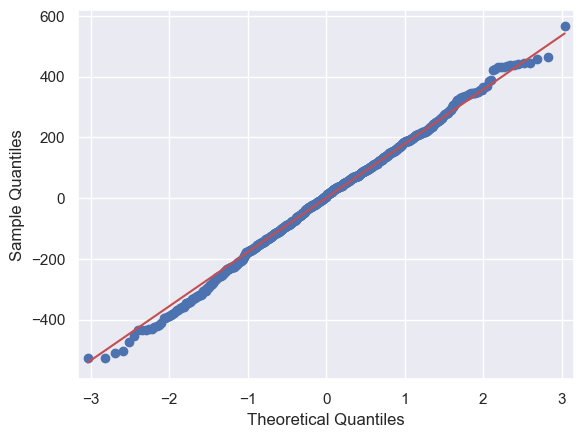

###############################################################################


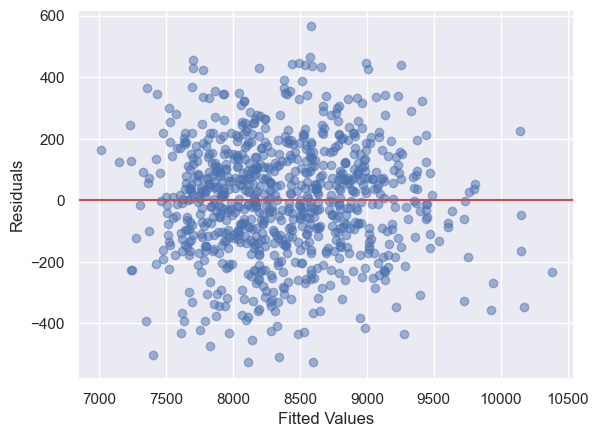

In [26]:
print(df.columns)
iv = ['2PA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']
dv = 'PTS'
model_pts = CTP_LinReg(df, iv, dv)
model_pts.run_all()



# Extract only the statistically signifant feautres (aka features with a p-value of <0.05)

In [35]:


significant_vars = model_pts.model.pvalues[model_pts.model.pvalues.round(3) < 0.05].round(3).copy()
sig_ivs = list(significant_vars.index)

sig_ivs.remove('const')
print(sig_ivs)

dv = 'PTS'
model_pts2 = CTP_LinReg(df, sig_ivs, dv)
model_pts2.build_model()
# model_pts2.run_all()


['2PA', '3PA', 'FTA', 'ORB', 'AST', 'STL']
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:46:10   Log-Likelihood:                -5541.5
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     828   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

# Model Interpertation

* r^2 score is very high
* Model's RMSE is 184, which means its on aveage 184 points away from the acutal.  Sounds high, however, the average prediction actual is 8370, and 184 is about 2% of the average, so on average we are about 2% off our target which is great. 

### Coefficient Interpertation

* 3PA seems to be the most important when it comes to scoring. This makes sense as 3P are worth the most. 
* Next is FT, which they are only worth one, however, they are made at such a high rate that that is probably why they are worth more than 2P. 
* Next is 2PA which also makes sense as they are a majority of how scoring is done in the NBA.
* Next biggest factor is assists, which also make sense as it measures assisting someone scoring.  
* What is suprising to me is that ORB (offensive rebounds) acutally lowers points scored.  This doesn't make much sense to me, but maybe its because you can only make an offensive rebound when you MISS a shot, so maybe that is why... because teams that miss more shots will have higher ORB and missing shots will obvisouly score less points. 

### Side note: Interesting Model
* Notice the coefficents are excatly how many points each point is worth....

In [31]:
ivs = ['2P', '3P', 'FT']
dv = 'PTS'
trippy = CTP_LinReg(df, ivs, dv)
trippy.build_model()

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.773e+31
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:43:13   Log-Likelihood:                 21380.
No. Observations:                 835   AIC:                        -4.275e+04
Df Residuals:                     831   BIC:                        -4.273e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.416e-12   1.12e-12      2.164      0.0

# Test our model

In [37]:
print(sig_ivs)

['2PA', '3PA', 'FTA', 'ORB', 'AST', 'STL']


In [43]:
test_df = pd.read_csv('data/NBA_test.csv')
test_df['points_diff'] = test_df['PTS'] - test_df['oppPTS']


ivs = ['2PA', '3PA', 'FTA', 'ORB', 'AST', 'STL']
dv = 'PTS'

X_test = test_df[ivs]
X_test = sm.add_constant(X_test)
X_test


y_test = test_df[dv]
y_pred = model_pts2.model.predict(X_test).round(1)

avg_error = rmse(y_test, y_pred)
print('Root Mean Squared Error: ', avg_error)

test_data_pts_avg = test_df[dv].mean()
print('Average Points Scored of test data', test_data_pts_avg)
print('RMSE Percentage off average:', ((avg_error / test_data_pts_avg)*100).round(2))


Root Mean Squared Error:  196.3664804462746
Average Points Scored of test data 8061.821428571428
RMSE Percentage off average: 2.44
